# Test of Piecewise Smooth Quadratic Estimators

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from interval import *
import psl_bounds as pl
import psqe_bounds as pq

Auxiliary plot routine

In [2]:
def plot_problem(flist, min_list, a, b):
    colors = ['r-', 'b-', 'g-', 'y-', 'm-', 'c-']
    step = (b - a) / 1000.
    ta = np.arange(a, b + step, step)
    num_points = len(ta)
    num_funcs = len(flist)

    fta = np.empty([num_funcs, num_points])
    print(fta)

    for i in range(num_funcs):
        for j in range(num_points):
            fta[i, j] = flist[i](ta[j])
    lb = np.amin(fta)
    ub = np.amax(fta)
    d = (ub - lb) * 0.1
    for i in range(num_funcs):
        plt.plot(ta, fta[i, :], colors[i])
    # for point in min_list:
    #     plt.scatter(point[0], point[1], s=20)
    plt.ylim([lb - d, ub + d])
    plt.axhline(y=0, linestyle='--', color='black')
    plt.text(0.5, 1, r'$\Phi(x)$', fontsize=18)
    plt.text(-0.2, 0.5, r'$f(x)$', fontsize=18)
    plt.text(-0.5, -2, r'$\phi(x)$', fontsize=18)
    plt.scatter(0.62, 0, s=22)
    plt.scatter(-0.22, 0, s=22)
    plt.scatter(-0.31, 0, s=22)
    plt.savefig('./first_root.png', dpi=500)
    plt.show()

Test problem

In [3]:
x = sym.symbols('x')
e_f = x ** 3 + 2 * x ** 2 - 4 * x - 1
# e_f = x ** 3 + 2 * x - 10 + sin(10 * x)

In [4]:
# x = sym.symbols('x')
# e_f = x ** 3 + 2 * x ** 2 - 4 * x-1+sin(x)
e_nf = -e_f
e_df = sym.diff(e_f)
e_ndf = -e_df
e_ddf = sym.diff(e_df)
e_nddf = -e_ddf
print(e_f, e_df, e_ddf)
module_sin = {"sin": sin}
module_cos = {"cos": cos}
f = sym.lambdify(x, e_f, modules=[module_sin, module_cos])
print('f', f(-1.))
print('f', f(2.))

nf = sym.lambdify(x, e_nf)
df = sym.lambdify(x, e_df, modules=[module_sin, module_cos])
ndf = sym.lambdify(x, e_ndf)
ddf = sym.lambdify(x, e_ddf, modules=[module_sin, module_cos])
nddf = sym.lambdify(x, e_nddf)
print(f(2.), df(2.))
a = -1.
b = 2.
idef = Interval([a, b])
di = df(idef)

# print(f(idef), df(idef), ddf(idef))
ddi = ddf(idef)
print(di, ddi)

x**3 + 2*x**2 - 4*x - 1 3*x**2 + 4*x - 4 6*x + 4
f 4.0
f 7.0
7.0 16.0
[-8.0, 16.0] [-2.0, 16.0]


In [5]:

# estim = pq.PSQE_Under(a, b, ddi.x[0], ddi.x[1], f, df)
l = max(-di.x[0], di.x[1])
L = max(-ddi.x[0], ddi.x[1])
# print(L)
estim_pl = pl.PSL_Bounds(a, b, di.x[0], di.x[1], f, True)
estim_plip = pl.PSL_Bounds(a, b, -l, l, f, True)
estim_pl_ob = pl.PSL_Bounds(a, b, di.x[0], di.x[1], f, False)

estim_int = pq.PSQE_Bounds(a, b, ddi.x[0], ddi.x[1], f, df, True)
estim_lip = pq.PSQE_Bounds(a, b, -L, L, f, df, True)
estim_int_ob = pq.PSQE_Bounds(a, b, ddi.x[0], ddi.x[1], f, df, False)

print(estim_pl)
print(estim_plip)
print(estim_int)
# print(estim_lip)
print(estim_int_ob)
min_list = [estim_int.lower_bound_and_point(),
            estim_int_ob.lower_bound_and_point()]
print(min_list)

Piecewise linear estimator a = -1.0, b = 2.0, c = 0.875, alp = -8.0, bet = 16.0, fa = 4.0, fb = 7.0
Piecewise linear estimator a = -1.0, b = 2.0, c = 0.40625, alp = -16.0, bet = 16.0, fa = 4.0, fb = 7.0
Estimator a = -1.0, b = 2.0, c = 0.25, d = 1.75, alp = -2.0, bet = 16.0, fa = 4.0, fb = 7.0, dfa = -5.0, dfb = 16.0
Estimator a = -1.0, b = 2.0, c = -0.75, d = 0.75, alp = -16.0, bet = 2.0, fa = -4.0, fb = -7.0, dfa = 5.0, dfb = -16.0
[(0.71875, -5.5703125), (2.0, 7.0)]


Vizualize test problem

[[0.00000000e+000 5.30498949e-313 0.00000000e+000 ... 4.44659081e-323
  1.90979621e-313 1.18575755e-322]
 [2.33687836e-314 9.88131292e-324 2.45565631e-314 ... 2.33763869e-314
  2.33763765e-314 2.33763784e-314]
 [2.33763862e-314 2.33763858e-314 2.33763843e-314 ... 5.59282311e-321
  2.45566435e-314 8.25089629e-322]]


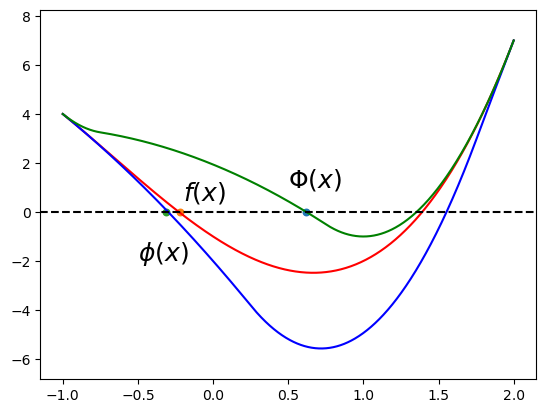

In [6]:
plot_problem([f, estim_int.estimator, estim_int_ob.nestimator], min_list, a, b)